# The Copy Model for Network Generation

## 1. Introduction

The Copy Model (also known as the duplication-divergence model or the duplication model) is a generative network model that mimics evolutionary processes in biological networks and has found applications in modeling various complex networks. Unlike purely statistical models, the copy model incorporates a mechanistic explanation for network growth based on node duplication and edge rewiring.

### Historical Context

The model was initially proposed in the early 2000s to explain the evolution of protein-protein interaction networks. Researchers observed that gene duplication followed by mutation plays a key role in biological network evolution, and the copy model provides a simplified mathematical framework to capture this process.

## 2. Theoretical Foundation

### Basic Mechanism

The copy model grows a network through the following iterative process:

1. **Duplication**: A new node v' is created by selecting an existing node v (the "parent") and copying it along with all its connections
2. **Divergence**: Some of the copied connections are modified through:
   - Edge deletion: Removing some connections with probability δ
   - Edge rewiring: Redirecting some connections to other nodes with probability α
   - (Optional) Adding new random connections with probability θ

### Mathematical Formulation

Starting with an initial graph G₀ = (V₀, E₀), at each time step t:

1. Select a random node u ∈ Vₜ with uniform probability
2. Create a new node v
3. For each neighbor w of u:
   - Add edge (v,w) with probability p (the copy probability)
4. Add edge (u,v) with probability r (the connection probability)

The parameter p controls the extent of copying, while r determines if the new node connects to its parent.

### Variants

Several variants exist:
- **Pure duplication model**: p = 1, r = 0
- **Duplication-mutation model**: 0 < p < 1, r = 0
- **Duplication-divergence model**: 0 < p < 1, 0 < r ≤ 1

### Theoretical Properties

1. **Degree Distribution**: The model generates networks with a power-law degree distribution P(k) ~ k^(-β), where β depends on the parameters p and r.
2. **Clustering Coefficient**: The copy model naturally produces high clustering coefficients, reflecting the triadic closure property found in many real-world networks.
3. **Component Structure**: Depending on parameters, the model can generate either a connected network or a network with multiple components.
4. **Analytical Results**:
   - When p > 1/2, the expected degree grows exponentially
   - When p < 1/2, the expected degree grows as a power law
   - At p = 1/2 (critical point), the model generates scale-free networks

## 3. Implementation Example

Below is a Python implementation demonstrating how to generate networks using a partial duplication approach (copy model) that supports both `p` and `r` parameters.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw  # For power law fitting

## 4. Analysis of Results

### Emergent Properties

When running the model with different parameters, we observe:

1. **Effect of p (copy probability)**:
   - High p: Creates hubs and dense clusters
   - Low p: More uniform degree distribution
   - p = 0.5: Scale-free properties emerge

2. **Effect of r (parent connection probability)**:
   - Higher r: Increases connectivity and reduces fragmentation
   - r = 0: Can result in disconnected components

p=0.1: Nodes=5000, Edges=2062, Components=3155, Giant component size=250
p=0.3: Nodes=5000, Edges=5626, Components=2093, Giant component size=1522
p=0.5: Nodes=5000, Edges=29915, Components=674, Giant component size=3813
p=0.7: Nodes=5000, Edges=272537, Components=3, Giant component size=4998


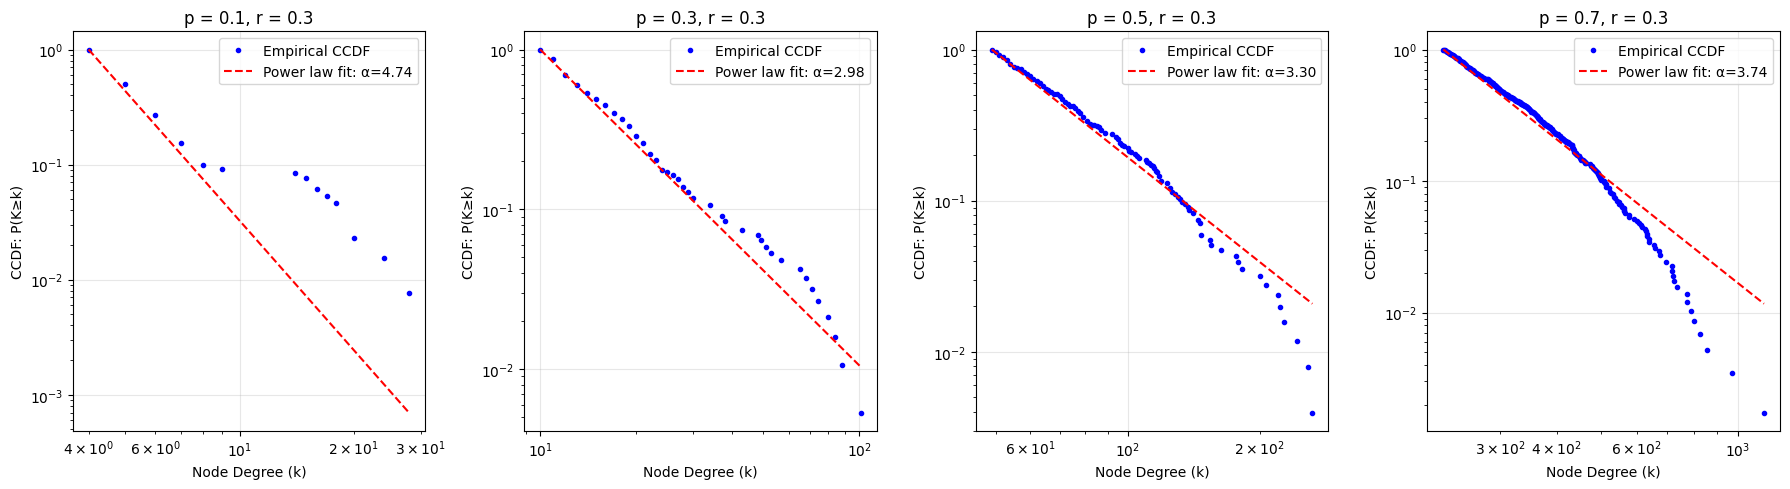

In [2]:


# Parameters for analysis
n_nodes = 5000  # Number of nodes
n_0 = 10  # Initial number of nodes
p_values = [0.1, 0.3, 0.5, 0.7]  # Different copy probabilities to test
q_value = 0.3  # Fixed value for parent connection probability

# Create figure for plotting
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Generate and analyze networks for each p value
for i, p in enumerate(p_values):
    # Generate network
    G = nx.partial_duplication_graph(n_nodes, n_0, p, q=q_value)
    
    # Get degree sequence
    degrees = [d for _, d in G.degree()]
    
    # Fit power law to the degree distribution
    fit = powerlaw.Fit(degrees, verbose=False)
    alpha = fit.power_law.alpha
    xmin = fit.power_law.xmin
    
    # Plot the degree distribution (CCDF)
    ax = axes[i]
    fit.plot_ccdf(ax=ax, label=f'Empirical CCDF', color='blue', linestyle='', marker='o', markersize=3)
    fit.power_law.plot_ccdf(ax=ax, label=f'Power law fit: α={alpha:.2f}', color='red', linestyle='--')
    
    ax.set_title(f'p = {p}, r = {q_value}')
    ax.set_xlabel('Node Degree (k)')
    ax.set_ylabel('CCDF: P(K≥k)')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Print some network statistics
    connected_components = list(nx.connected_components(G))
    largest_cc = max(connected_components, key=len)
    print(f"p={p}: Nodes={G.number_of_nodes()}, Edges={G.number_of_edges()}, " + 
          f"Components={len(connected_components)}, Giant component size={len(largest_cc)}")

plt.tight_layout()
plt.show()


q=0.1: Nodes=5000, Edges=35514, Components=1115, Giant component size=3575
q=0.3: Nodes=5000, Edges=17562, Components=956, Giant component size=2622
q=0.5: Nodes=5000, Edges=40213, Components=199, Giant component size=4594
q=0.7: Nodes=5000, Edges=48320, Components=76, Giant component size=4795


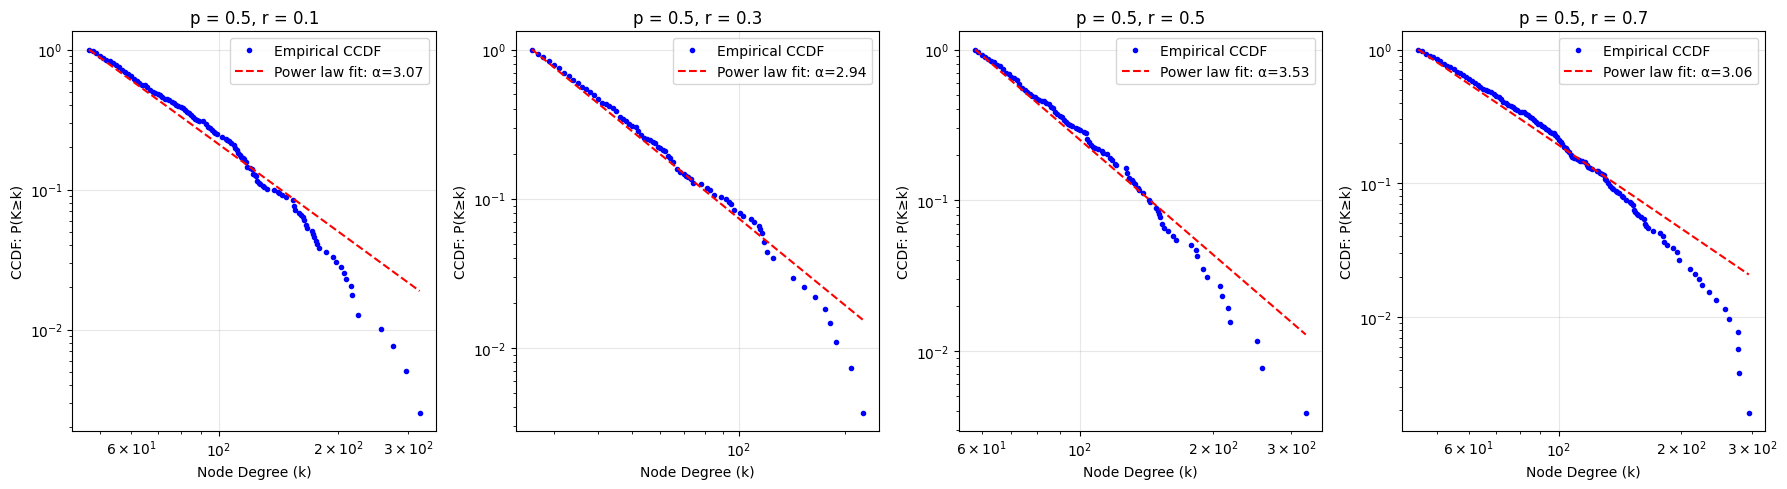

In [3]:
# Parameters for analysis with varying parent connection probability (q)
n_nodes = 5000  # Number of nodes
n_0 = 10  # Initial number of nodes
p_value = 0.5  # Fixed value for copy probability
q_values = [0.1, 0.3, 0.5, 0.7]  # Different parent connection probabilities to test

# Create figure for plotting
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Generate and analyze networks for each q value
for i, q in enumerate(q_values):
    # Generate network
    G = nx.partial_duplication_graph(n_nodes, n_0, p_value, q=q)
    
    # Get degree sequence
    degrees = [d for _, d in G.degree()]
    
    # Fit power law to the degree distribution
    fit = powerlaw.Fit(degrees, verbose=False)
    alpha = fit.power_law.alpha
    xmin = fit.power_law.xmin
    
    # Plot the degree distribution (CCDF)
    ax = axes[i]
    fit.plot_ccdf(ax=ax, label=f'Empirical CCDF', color='blue', linestyle='', marker='o', markersize=3)
    fit.power_law.plot_ccdf(ax=ax, label=f'Power law fit: α={alpha:.2f}', color='red', linestyle='--')
    
    ax.set_title(f'p = {p_value}, r = {q}')
    ax.set_xlabel('Node Degree (k)')
    ax.set_ylabel('CCDF: P(K≥k)')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Print some network statistics
    connected_components = list(nx.connected_components(G))
    largest_cc = max(connected_components, key=len)
    print(f"q={q}: Nodes={G.number_of_nodes()}, Edges={G.number_of_edges()}, " + 
          f"Components={len(connected_components)}, Giant component size={len(largest_cc)}")

plt.tight_layout()
plt.show()

p=0.5, q=0.1: Avg clustering=0.0799, Transitivity=0.0502
p=0.5, q=0.3: Avg clustering=0.2117, Transitivity=0.0731
p=0.5, q=0.5: Avg clustering=0.3305, Transitivity=0.1009
p=0.5, q=0.7: Avg clustering=0.4041, Transitivity=0.1398


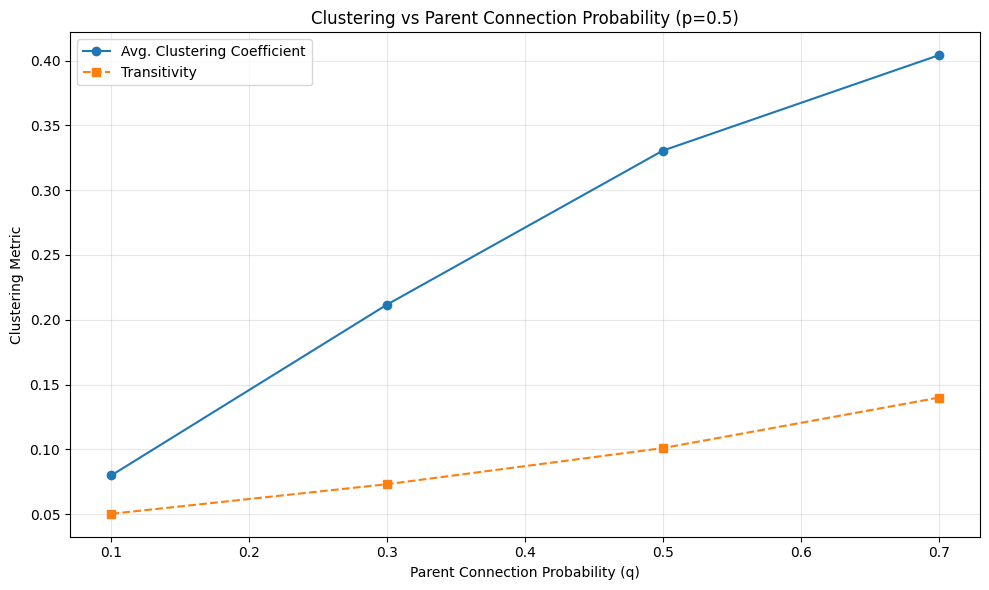

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_nodes = 5000  # Number of nodes
n_0 = 10  # Initial number of nodes

# Create figure for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Analyze effect of parent connection probability (q) on clustering coefficient
q_values = [0.1, 0.3, 0.5, 0.7]
p_fixed = 0.5  # Fixed copy probability

q_clustering = []
q_transitivity = []

for q in q_values:
    # Generate network
    G = nx.partial_duplication_graph(n_nodes, n_0, p_fixed, q=q)
    
    # Calculate clustering metrics
    avg_clustering = nx.average_clustering(G)
    transitivity = nx.transitivity(G)
    
    q_clustering.append(avg_clustering)
    q_transitivity.append(transitivity)
    
    print(f"p={p_fixed}, q={q}: Avg clustering={avg_clustering:.4f}, Transitivity={transitivity:.4f}")

# Plot results for varying q
ax.plot(q_values, q_clustering, 'o-', label='Avg. Clustering Coefficient')
ax.plot(q_values, q_transitivity, 's--', label='Transitivity')
ax.set_xlabel('Parent Connection Probability (q)')
ax.set_ylabel('Clustering Metric')
ax.set_title(f'Clustering vs Parent Connection Probability (p={p_fixed})')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()


In [5]:
# Plot results for varying q
ax.plot(q_values, q_clustering, 'o-', label='Avg. Clustering Coefficient')
ax.plot(q_values, q_transitivity, 's--', label='Transitivity')
ax.set_xlabel('Parent Connection Probability (q)')
ax.set_ylabel('Clustering Metric')
ax.set_title(f'Clustering vs Parent Connection Probability (p={p_fixed})')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

<!-- Removed redundant analysis code referencing the NetworkX-only approach. -->

### Comparison with Empirical Networks

| Property               | Copy Model                               | Real Networks         |
|------------------------|------------------------------------------|-----------------------|
| Degree distribution   | Power-law (when p ≈ 0.5)                 | Often power-law       |
| Clustering            | High                                      | High                  |
| Assortativity         | Variable                                  | Often positive        |
| Community structure   | Present                                   | Present               |

## 5. Advantages and Limitations

### Advantages

1. **Biological Relevance**: Directly models evolutionary mechanisms like gene duplication
2. **Emergent Properties**: Naturally produces characteristics like high clustering and power-law distributions
3. **Flexibility**: Can be tuned via parameters to match different network structures
4. **Mechanistic**: Unlike purely statistical models, provides a mechanistic explanation for network formation

### Limitations

1. **Parameter Sensitivity**: Results can vary significantly based on parameter choices
2. **Limited Control**: Difficult to precisely control resulting topological properties
3. **Simplification**: Ignores many complex factors present in real evolutionary processes
4. **Time Complexity**: Pure implementations scale as O(n²) in dense networks
5. **Homogeneous Assumptions**: Assumes uniform probabilities across all nodes and edges

## 6. Applications

### Biological Networks

- **Protein-Protein Interaction Networks**: Models how protein networks evolve through gene duplication and mutation
- **Metabolic Networks**: Captures the evolution of metabolic pathways
- **Gene Regulatory Networks**: Models transcription networks and their evolution

### Technological Networks

- **Web Graphs**: Modeling how websites copy structure from existing ones
- **Software Dependencies**: Capturing how code dependencies evolve through copying and modification

### Social Networks

- **Online Social Networks**: Modeling friend recommendations based on existing connections
- **Scientific Collaboration**: Capturing how collaboration patterns form through existing relationships

### Knowledge Networks

- **Citation Networks**: Modeling how papers cite previous work in similar patterns
- **Patent Networks**: Understanding technology evolution through invention patterns

## 7. Extensions and Variations

- **Aging Copy Model**: Incorporates node age in the duplication probability
- **Directed Copy Model**: Extends the model to directed networks
- **Weighted Copy Model**: Incorporates edge weights in the copying process
- **Bipartite Copy Model**: Applies the mechanism to two-mode networks
- **Hierarchical Copy Model**: Incorporates hierarchical structure in the copying process

## 8. Conclusion

The copy model provides a simple yet powerful framework for understanding and generating networks with properties similar to many real-world complex systems. Its strength lies in its mechanistic approach that mimics evolutionary processes, making it particularly suitable for modeling biological and technological networks. While it has limitations, the model continues to be an important tool in network science, especially when the underlying growth process involves duplication and modification mechanisms.

## References
1. Kumar, R., Raghavan, P., Rajagopalan, S., Sivakumar, D., Tomkins, A., & Upfal, E. (2000). Stochastic models for the web graph. In Proceedings of the 41st Annual Symposium on Foundations of Computer Science.
2. Vázquez, A., Flammini, A., Maritan, A., & Vespignani, A. (2003). Modeling of protein interaction networks. Complexus, 1(1), 38-44.
3. Chung, F., Lu, L., Dewey, T. G., & Galas, D. J. (2003). Duplication models for biological networks. Journal of computational biology, 10(5), 677-687.
4. Ispolatov, I., Krapivsky, P. L., & Yuryev, A. (2005). Duplication-divergence model of protein interaction network. Physical review E, 71(6), 061911.
5. Pastor-Satorras, R., Smith, E., & Solé, R. V. (2003). Evolving protein interaction networks through gene duplication. Journal of theoretical biology, 222(2), 199-210.